<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#순환 신경망(RNN)
RNN은 Recurrent Neural Network의 약어이다. 음성이나, 문장, 동영상 등을 다루는 데 적합하다. RNN은 시간 변화하는 데이터 즉 시계열 데이터를 다룰 수 있게 된다.

RNN에 사용할 데이터 작성, sin() 함수에 난수로 노이즈를 더한 데이터를 작성하고, 과거의 시계열 데이터로부터 미래의 값을 예측할 수 있도록 한다.



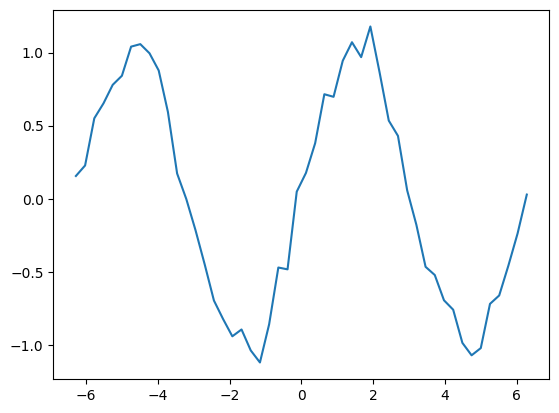

(40, 10, 1)
(40, 10, 1)


In [1]:
#훈련 데이터의 작성
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  #-2파이 에서 2파이 까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))  #sin() 함수에 난수로 노이즈를 더한다

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10   #시계열의 수
n_sample = len(x_data)-n_rnn  #샘플 수
x = np.zeros((n_sample, n_rnn))  #입력
t = np.zeros((n_sample, n_rnn))  #정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]  #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)  #Keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수, 입력층의 뉴런 수)로 한다
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  #이번은 입력과 같은 형태
print(t.shape)

#RNN의 구축
Keras를 사용해 간단한 RNN 구축, Keras에서 간단한 RNN층은 SimpleRNN() 함수에 의해 구현할 수 있습니다.

SimpleRNN()은 다음과 같이 설정.

SimpleRNN(뉴런 수, return_sequences=시계열을 전부 반환할지 여부)

In [2]:
#간단한 RNN 모델을 구축한다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

n_in = 1  #입력층의 뉴런 수
n_mid = 20  #중간층의 뉴런 수
n_out = 1  #출력층의 뉴런 수

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))  #간단한 RNN층
model.add(Dense(n_out, activation='linear'))  #전결합층
model.compile(loss='mean_squared_error', optimizer='sgd')  #오차는 제곱오차, 최적화 알고리즘은 SGD
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [3]:
#RNN 모델을 훈련한다
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 3s 156ms/step - loss: 0.6007 - val_loss: 0.2723
Epoch 2/20
5/5 [==============================] - 0s 30ms/step - loss: 0.3949 - val_loss: 0.1925
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.2860 - val_loss: 0.1404
Epoch 4/20
5/5 [==============================] - 0s 31ms/step - loss: 0.2181 - val_loss: 0.1137
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 0.1734 - val_loss: 0.0938
Epoch 6/20
5/5 [==============================] - 0s 19ms/step - loss: 0.1418 - val_loss: 0.0821
Epoch 7/20
5/5 [==============================] - 0s 21ms/step - loss: 0.1198 - val_loss: 0.0732
Epoch 8/20
5/5 [==============================] - 0s 37ms/step - loss: 0.1044 - val_loss: 0.0647
Epoch 9/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0937 - val_loss: 0.0590
Epoch 10/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0859 - val_loss: 0.0532
Epoch 11/20
5/5 [===========

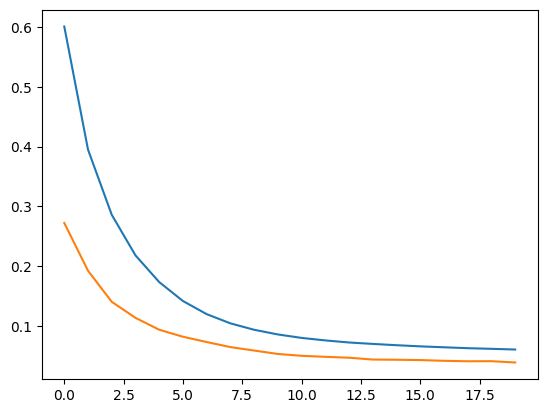

In [4]:
#학습의 추이를 표시
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

1/1 [==============================] - 0s 47ms/step


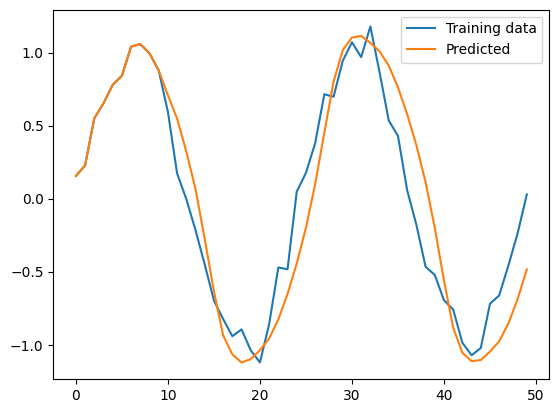

In [5]:
#학습한 RNN 모델을 사용해서 예측한 결과
predicted = x[0].reshape(-1)
                                  #처음의 입력. reshape(-1)으로 1차원의 벡터로 한다
for i in range(0, n_sample):
  y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))       #최근 데이터를 사용해서 예측을 실시한다
  predicted = np.append(predicted, y[0][n_rnn-1][0])               #출력의 최후 결과를 predicted에 추가한다

plt.plot(np.arange(len(sin_data)), sin_data, label='Training data')    #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)), predicted, label='Predicted')      #예측 결과
plt.legend()
plt.show()

#LSTM(Long Short Term Memory)
RNN의 장기 기억을 보유하기 어렵다는 문제점을 극복한 것이 LSTM이다.

LSTM은 장기의 기억도 단기의 기억도 함께 보유할 수 있습니다.

LSTM은 RNN의 일종이다. 일반적인 RNN은 장기 기억을 잘못하는데 LSTM은 이 장기 기억을 잘한다.

sin() 함수에 난수로 노이즈를 더한 데이터를 생성하고 과거의 시계열 데이터로부터 미래의 값을 예측할 수 있도록 합니다.

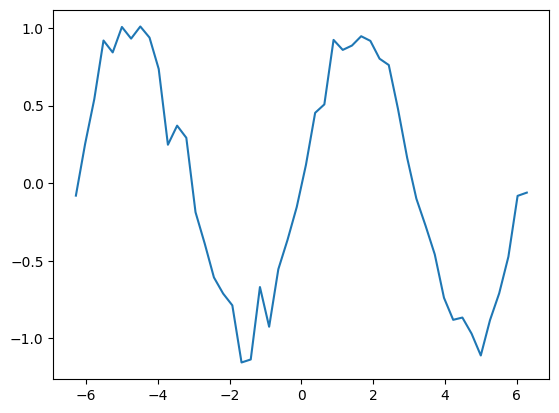

(40, 10, 1)
(40, 10, 1)


In [6]:
#훈련용 데이터의 작성
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  #-2파이에서 2파이까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))   #sin() 함수에 난수로 노이즈를 더한다

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10  #시계열의 수
n_sample = len(x_data)-n_rnn  #샘플 수
x = np.zeros((n_sample, n_rnn))  #입력
t = np.zeros((n_sample, n_rnn))  #정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]  #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)  #샘플 수, 시계열의 수, 입력층의 뉴런 수
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  #이번은 입력과 같은 형태
print(t.shape)

LSTM(뉴런 수, return_sequences=시계열을 모두 반환할지 여부)

In [7]:
#RNN과 LSTM 구현
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, SimpleRNN, LSTM

n_in = 1  #입력층의 뉴런 수
n_mid = 20   #중간층의 뉴런 수
n_out = 1  #출력층의 뉴런 수

#비교를 위한 통상의 RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_rnn.add(Dense(n_out, activation='linear'))
model_rnn.compile(loss='mean_squared_error', optimizer='sgd')
print(model_rnn.summary())

#LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation='linear'))
model_lstm.compile(loss='mean_squared_error', optimizer='sgd')
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 20)            440       
_________________________________________________________________
dense (Dense)                (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 20)            1760      
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#모델의 학습
import time

epochs = 500
batch_size = 8  #배치 크기

#일반적인 RNN
start_time = time.time()
history_rnn = model_rnn.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('학습 시간 --일반적인 RNN--:', time.time() - start_time)

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x,t, epochs=epochs, batch_size=batch_size, verbose=0)
print('학습시간 --LSTM--:', time.time() - start_time)

AttributeError: ignored

In [ ]:
#학습의 추이를 표시
loss_rnn = history_rnn,history['loss']
loss_lstm = history_lstm.history['loss']

plt.plot(np.arange(len(loss_rnn)), loss_rnn, label='RNN')
plt.plot(np.arange(len(loss_lstm)), loss_lstm, label='LSTM')
plt.legend()
plt.show()

In [ ]:
#학습한 모델을 사용한 예측
predicted_rnn = x[0].reshape(-1)
predicted_lstm = x[0].reshape(-1)

for i in range(0, n_sample):
  y_rnn = model_rnn.predict(predicted_rnn[-n_rnn].reshape(1, n_rnn, 1))
  predicted_rnn = np.append(predicted_rnn, y_rnn[0][n_rnn-1][0])
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_lstm = np.append(predicted_lstm, y_lstm[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)), sin_data, label='Training data')
plt.plot(np.arange(len(predicted_rnn)), predicted_rnn, label='Predicted_RNN')
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label='Predicted_LSTM')
plt.legend()
plt.show()

#GRU
GRU는 Gated Recurrent Unit의 약어로 LSTM을 개량한 것이다.

LSTM과 비교해서 전체적으로 간단한 구조로 계산량이 적어진다.

In [ ]:
#훈련데이터 작성
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  #-2파이에서 2파이까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))  #sin() 함수에 난수로 노이즈를 더한다
plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10  #시계열의 수
n_sample = len(x_data)-n_rnn  #샘플 수
x = np.zeros((n_sample, n_rnn))  #입력
t = np.zeros((n_sample, n_rnn))  #정답
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]  #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)  #샘플 수, 시계열의 수, 입력층의 뉴런 수
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  #이번은 입력과 같은 형태
print(t.shape)

GRU(뉴런 수, return_sequences=시계열을 전부 반환할지 여부)

In [ ]:
#LSTM과 GRU의 비교
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, GRU

n_in = 1  #입력층의 뉴런 수
n_mid = 20  #중간층의 뉴런 수
n_out = 1  #출력층의 뉴런 수

#비교를 위한 LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation='linear'))
model_lstm.compile(loss='mean_squared_error', optimizer='sgd')
print(model_lstm.summary())

#GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_gru.add(Dense(n_out, activation='linear'))
model_gru.compile(loss='mean_squared_error', optimizer='sgd')
print(model_gru.summary())

In [ ]:
#모델의 학습
import time

epochs = 500
batch_size = 8  #배치 크기

#LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('학습 시간 --LSTM--:', time.time() - start_time)

#GRU
start_time = time.time()
history_gru = model_gru,fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('학습 시간 --GRU--:', time.time() - start_time)

In [ ]:
#학습의 추이를 표시
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_lstm)), loss_lstm, label='LSTM')
plt.plot(np.arange(len(loss_gru)), loss_gru, label='GRU')
plt.legend()
plt.show()

In [ ]:
#예측한 모델을 사용해서 예측
predicted_lstm = x[0].reshape(-1)
predicted_gru = x[0].reshape(-1)

for i in range(0, n_sample):
  y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1))
  predicted_lstm = np.append(predicted_gru, y_gru[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)), sin_data, label='Training data')
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label='Predicted_LSTM')
plt.plot(np.arange(len(predicted_gru)), predicted_gru, label='Predicted_GRU')
plt.legend()
plt.show()

#RNN에 의한 문장의 자동 생성
RNN,LSTM,GRU 이 3가지 RNN으로 각각 모델을 구축하여 문장의 생성 결과를 비교

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

#google 드라이브상의 텍스트 데이터로의 경로 지정
nov_path = '/content/drive/MyDrive/' + '테스트 데이터.txt'

#파일을 읽어 들인다
with open(nov_path, 'r') as f:
  nov_text = f.read()
  print(nov_text[:2000])  #첫 2000 문자만 표시

In [ ]:
#정규 표현에 의한 전처리
import re  #정규표현에 필요한 라이브러리

text = re.sub('[|   ]', '', nov_text)  # | 과 공백의 삭제
print('문자 수', len(text))   #lee() 으로 문자열의 문자 수도 취득 가능

In [ ]:
#RNN의 각 설정
n_rnn = 10   #시계열의 수
batch_size = 128
epochs = 60
n_mid = 128  #중간층의 뉴런 수

In [ ]:
#문자의 벡터화

#인덱스와 문자로 사전을 작성
chars = sorted(list(set(text)))  #set으로 문자의 중복을 없애고, 각 문자를 리스트에 저장한다
print('문자 수(중복 없음)', len(chars))
char_indices = {}   #문자가 키로 인덱스가 값
for i, char in enumerate(chars):
  char_indices[char] = i
indices_char = {}
for i, char in enumerate(chars):
  indices_char[i] = char

#시계열로 늘어선 문자와 그 다음에 예측해야 할 문자를 꺼낸다
time_chars = []  #시계열에 늘어선 문자
next_chars = []  #예측해야 할 문자
for i in range(0, len(text) - n_rnn):
  time_chars.append(text[i: i+n_rnn])
  next_chars.append(text[i + n_rnn])

#입력과 정답을 one-hot 표현으로 나타냅니다
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool_)  #입력
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool_)
for i, t_cs in enumerate(time_chars):
  t[i, char_indices[next_chars[i]]] = 1  #정답을 one-hot 표현으로 나타낸다
  for j, char in enumerate(t_cs):
    x[i, j, char_indices[char]] = 1  #입력을 one-hot 표현으로 나타낸다

print('x의 형태', x.shape)
print('t의 형태', t.shape)

In [ ]:
#일반적인 RNN,LSTM,GRU 모델을 구축
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, SimpleRNN, LSTM, GRU

#일반적인 RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, len(chars))))
model_rnn.add(Dense(len(chars), activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam')
print(model_rnn.summary())

print()

#LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, len(chars))))
model_lstm.add(Dense(len(chars), activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam')
print(model_lstm.summary())

print()

#GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, len(chars))))
model_gru.add(Dense(len(chars), activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam')
print(model_gru.summary())


In [ ]:
#문장 생성용의 함수
from tensorflow.python.keras.callbacks import LambdaCallback

def on_epoch_end(epoch, logs):
  print('에포크:', epoch)

  beta = 5  #확률 분포를 조정하는 상수
  prev_text = text[0:n_rnn]  #압력에 사용하는 문자
  created_text = prev_text  #생성되는 텍스트

  print('시드:', created_text)

  for i in range(400):  #400 문자를 생성한다
    #입력을 one-hot 표현으로
    x_pred = np.zeros((1, n_rnn, len(chars)))
    for j, char in enumerate(prev_text):
      x_pred[0, j, char_indices[char]] = 1

    #예측을 실시, 다음 문자를 얻는다
    y = model.predict(x_pred)
    p_power = y[0] ** beta  #확률 분포의 조정
    next_index = np.random.choice(lem(p_power), p=p_power/np.sum(p_power))
    next_char = indices_char[next_index]

    created_text += next_char
    prev_text = prev_text[1:] + next_char

  print(created_text)
  print()

#에포크 종료 후에 실행할 함수를 설정
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
#일반적인 RNN
model = model_rnn
history_rnn = model_rnn.fit(x, t,
                            batch_size=batch_size,
                            epochs=epochs,
                            callbacks=[epock_end_callback])

In [ ]:
#일반적인 LSTM
model = model_lstm
history_lstm = model_lstm.fit(x, t,
                            batch_size=batch_size,
                            epochs=epochs,
                            callbacks=[epock_end_callback])

In [ ]:
#일반적인 GRU
model = model_gru
history_gru = model_gru.fit(x, t,
                            batch_size=batch_size,
                            epochs=epochs,
                            callbacks=[epock_end_callback])

In [ ]:
#학습의 추이를 표시
import matplotlib.pyplot as plt

loss_rnn = history_rnn.history['loss']
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_rnn)), loss_rnn, label='RNN')
plt.plot(np.arange(len(loss_lstm)), loss_lstm, label='LSTM')
plt.plot(np.arange(len(loss_gru)), loss_gru, label='GRU')
plt.legend()
plt.show()